In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Import dataset

In [2]:
# Load the dataset
df = pd.read_excel("orignal.xlsx")

In [3]:
# Display the first few rows of the dataset
df.head()

,NO.,Si,Mg,Fe,Cu,Ni,Cr,Mn,Ti,Zn,Sr,UTS,YS,"El,%"
0,1,7.15,0.03,0.68,1.24,0.01,0.01,0.01,0.01,0.44,0,273.0,114.5,5.58
1,2,6.99,0.01,0.56,1.15,0.01,0.01,0.47,0.24,2.87,0.018,292.3,137.9,7.43
2,3,6.98,0.04,1.49,4.99,0.44,0.13,0.10,0.1,0.47,0.018,313.0,175.8,2.81
3,4,6.94,0.04,1.48,4.74,0.47,0.15,0.00,0.16,2.69,0,324.1,175.8,2.81
4,5,7.05,0.44,0.67,1.18,0.53,0.14,0.01,0.01,2.76,0,306.1,171.7,3.76


In [4]:
# Dispalt the shape of the orginal dataset
df.shape

(37, 14)

In [5]:
# Data description
df.describe()

,NO.,Si,Mg,Fe,Cu,Mn,UTS,YS,"El,%"
count,37.000000,37.000000,37.000000,37.000000,37.000000,36.000000,37.000000,36.000000,37.000000
mean,19.000000,9.755405,0.226757,0.862432,3.117027,0.271667,303.633514,167.405556,3.108757
std,10.824355,2.112735,0.226422,0.499997,1.383056,0.187197,28.641697,28.833769,1.700954
min,1.000000,6.790000,0.010000,0.100000,1.130000,0.000000,204.000000,107.000000,0.670000
25%,10.000000,8.300000,0.040000,0.580000,1.750000,0.115000,293.700000,150.225000,1.510000
50%,19.000000,9.250000,0.110000,0.800000,3.490000,0.260000,310.300000,166.950000,2.810000
75%,28.000000,11.300000,0.440000,1.270000,4.540000,0.455000,320.000000,185.125000,4.620000
max,37.000000,13.030000,0.880000,1.630000,5.090000,0.570000,344.000000,226.800000,7.430000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO.     37 non-null     int64  
 1   Si      37 non-null     float64
 2   Mg      37 non-null     float64
 3   Fe      37 non-null     float64
 4   Cu      37 non-null     float64
 5   Ni      37 non-null     object 
 6   Cr      37 non-null     object 
 7   Mn      36 non-null     float64
 8   Ti      37 non-null     object 
 9   Zn      37 non-null     object 
 10  Sr      37 non-null     object 
 11  UTS     37 non-null     float64
 12  YS      36 non-null     float64
 13  El,%    37 non-null     float64
dtypes: float64(8), int64(1), object(5)
memory usage: 4.2+ KB


In [7]:
# Check if the data has any duplicate values 
df.duplicated().sum()

0

# Exploratory Data Analysis

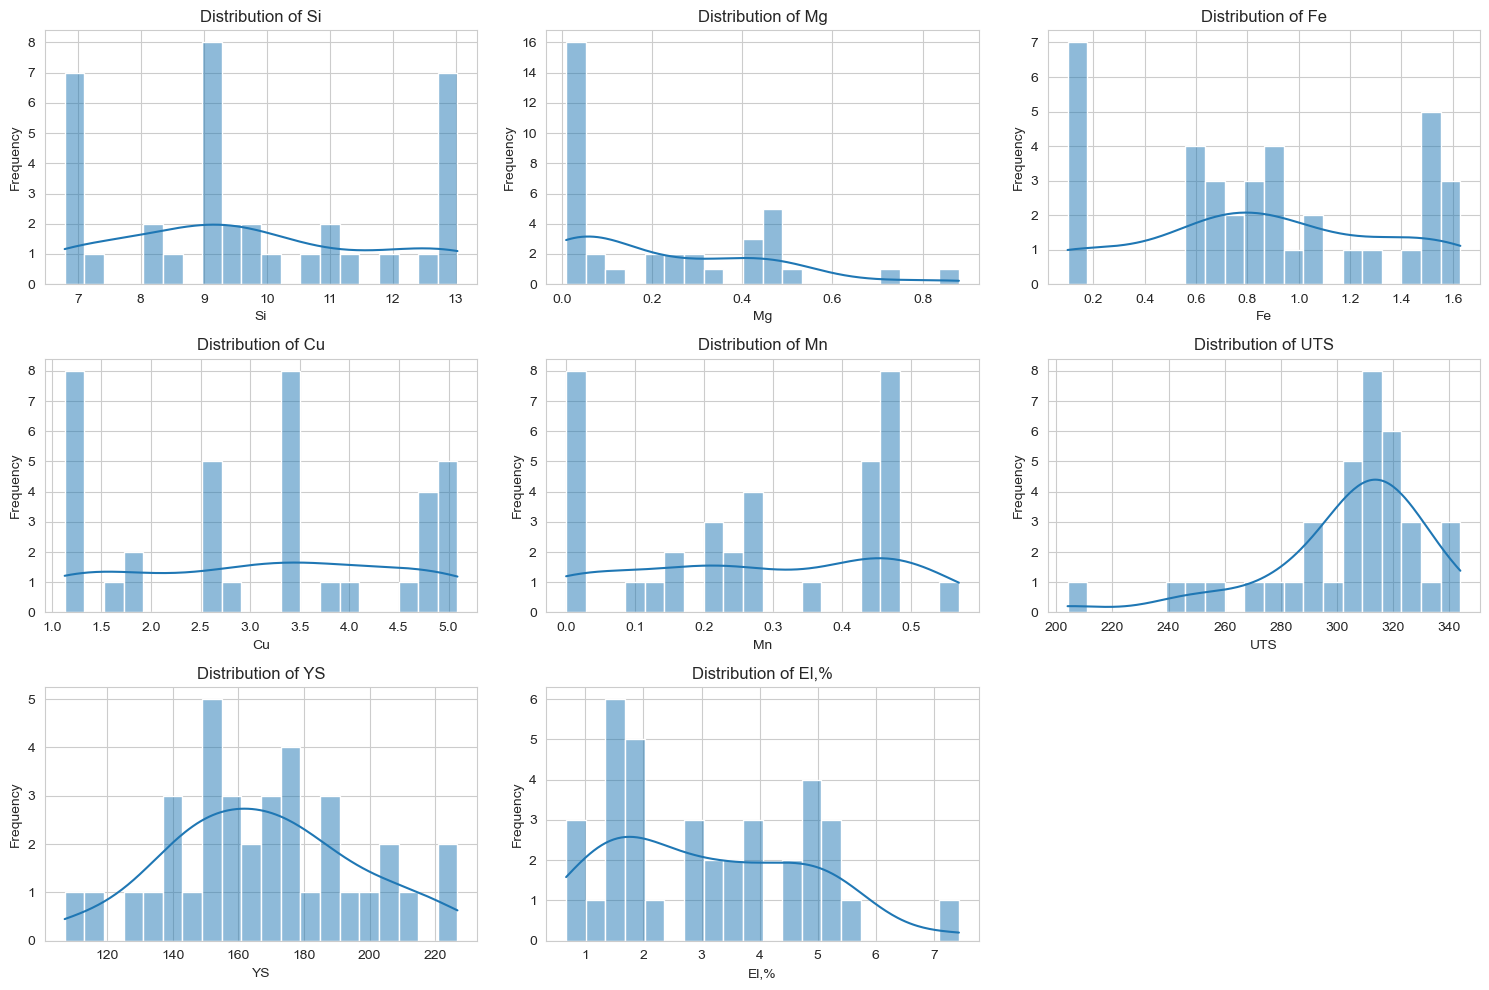

In [8]:
sns.set_style("whitegrid")

# Plotting the distribution of continuous variables
features = ['Si', 'Mg', 'Fe', 'Cu', 'Mn', 'UTS', 'YS', 'El,%']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [9]:
# Replace non-numeric values with NaN
df = df.replace('-', float('nan'))

# List of column names (excluding 'NO.')
cols = df.columns.tolist()[1:]

In [10]:
# Check the number of null values in each column
df.isnull().sum()

NO.      0
Si       0
Mg       0
Fe       0
Cu       0
Ni      10
Cr      11
Mn       1
Ti      12
Zn       8
Sr      21
UTS      0
YS       1
El,%     0
dtype: int64

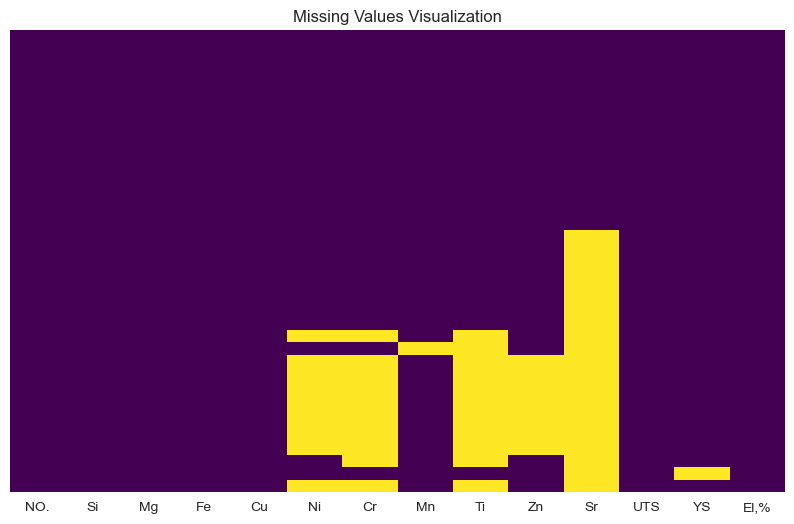

In [11]:
# 1. Missing Values Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Visualization')
plt.show()

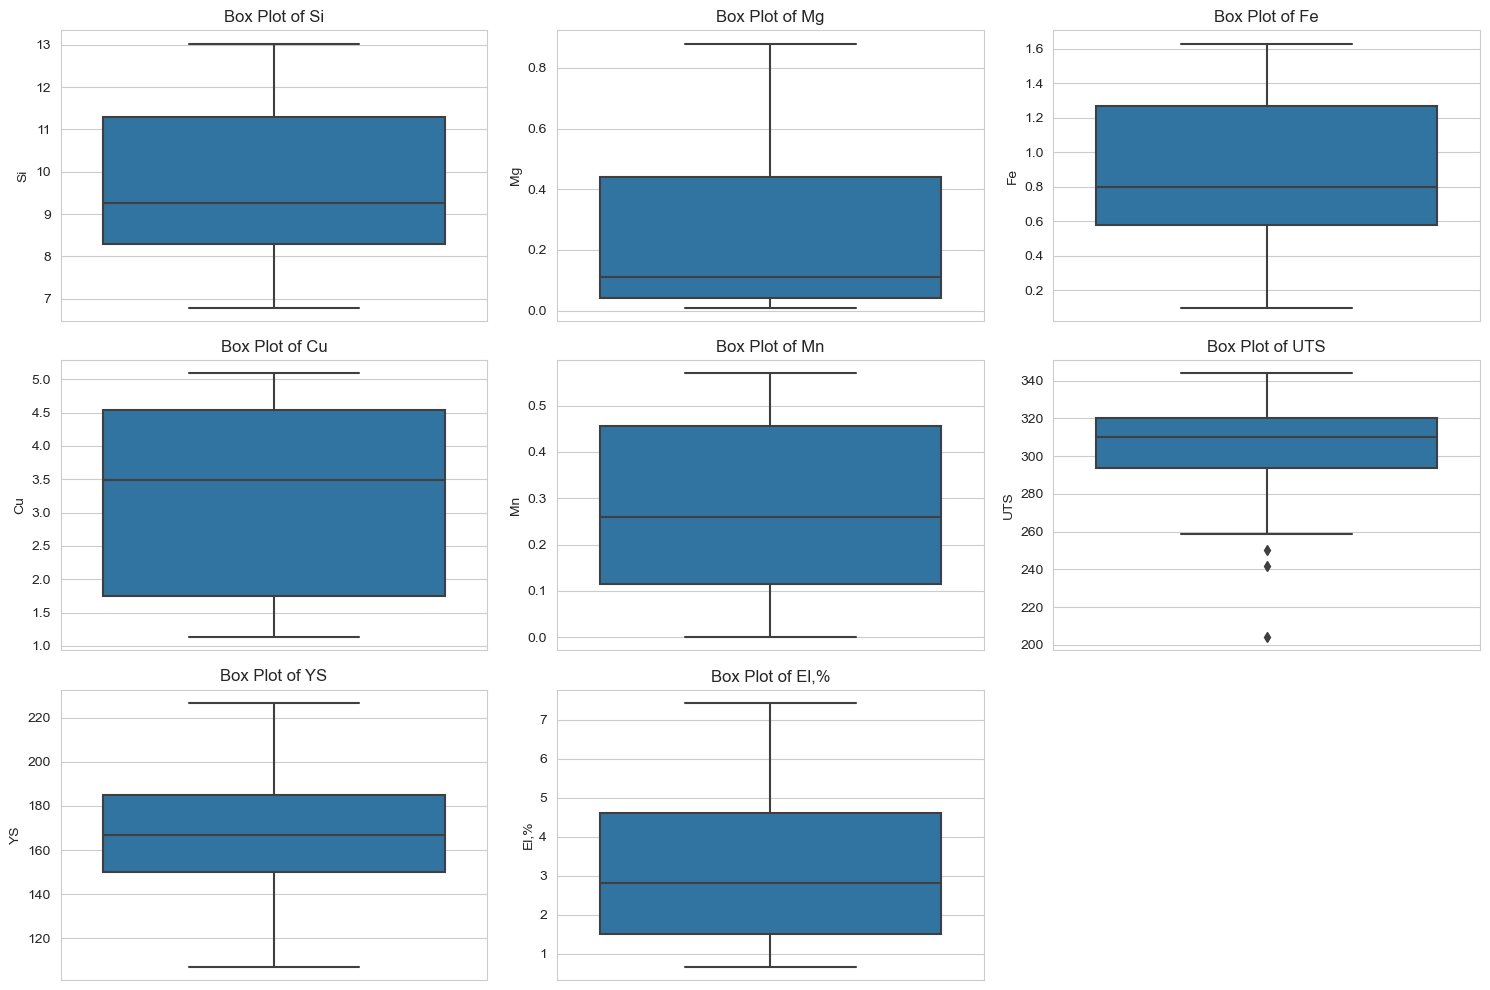

In [12]:
# 2. Data Distribution - Box Plots

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

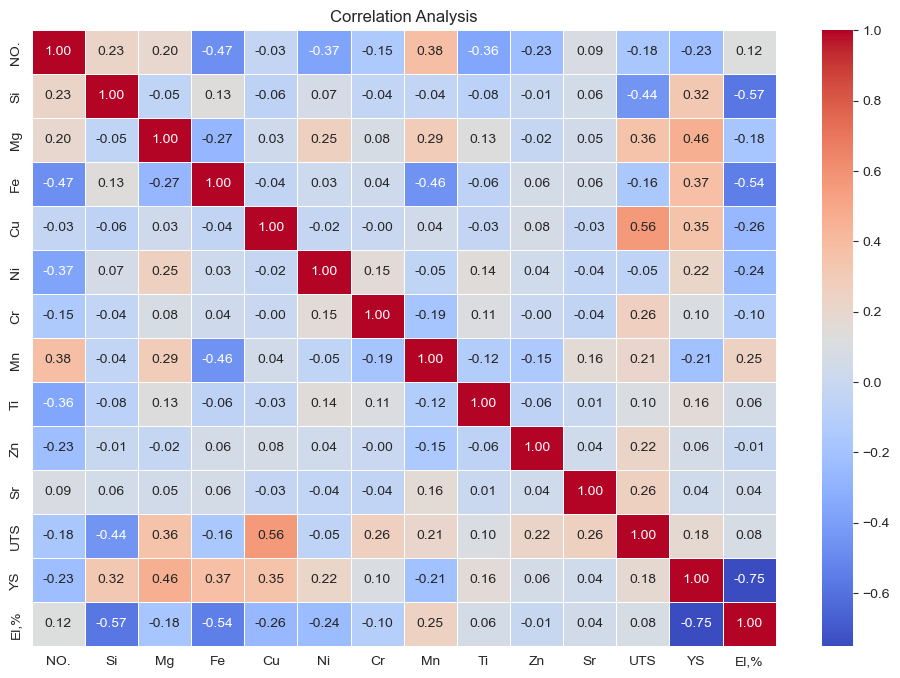

In [13]:
# 3. Correlation Analysis

# Compute the correlation matrix
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Analysis')
plt.show()

## Data Cleaning

In [14]:
# Check the NA Values
df.isnull().sum()

NO.      0
Si       0
Mg       0
Fe       0
Cu       0
Ni      10
Cr      11
Mn       1
Ti      12
Zn       8
Sr      21
UTS      0
YS       1
El,%     0
dtype: int64

In [15]:
# Convert all columns to numeric data type
df = df.apply(pd.to_numeric, errors='coerce')

# Check for any other non-numeric values
non_numeric_values = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

non_numeric_values

[]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NO.     37 non-null     int64  
 1   Si      37 non-null     float64
 2   Mg      37 non-null     float64
 3   Fe      37 non-null     float64
 4   Cu      37 non-null     float64
 5   Ni      27 non-null     float64
 6   Cr      26 non-null     float64
 7   Mn      36 non-null     float64
 8   Ti      25 non-null     float64
 9   Zn      29 non-null     float64
 10  Sr      16 non-null     float64
 11  UTS     37 non-null     float64
 12  YS      36 non-null     float64
 13  El,%    37 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 4.2 KB


In [17]:
# Check data types of each column
data_types = df.dtypes

# Identify columns with object data type
object_columns = df.select_dtypes(include=['object']).columns

# Check unique values in columns with object data type to identify potential issues
object_column_values = {col: df[col].unique() for col in object_columns}

object_column_values

{}

In [18]:
object_columns

Index([], dtype='object')

### Outlier Detection

In [19]:
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return ~series.between(lower_bound, upper_bound)

In [20]:
# Now, let's detect outliers again using the IQR method
outliers = df.apply(detect_outliers)
# Count of outliers for each column
outliers_count = outliers.sum()
outliers_count

NO.      0
Si       0
Mg       0
Fe       0
Cu       0
Ni      10
Cr      11
Mn       1
Ti      12
Zn       8
Sr      21
UTS      3
YS       1
El,%     0
dtype: int64

In [21]:
# Initialize iteration variable and run loop until no more outliers are found
iteration = 0
# Create a copy of the original DataFrame
df2 = df.copy()
while True:
    iteration += 1
    outliers = df2.apply(detect_outliers)
    outliers_count = outliers.sum()

    if all(outliers_count == 0):
        break

    for col in outliers_count.index[outliers_count > 0]:
        df2[col] = np.where(outliers[col], df2[col].median(), df2[col])
outliers_count

NO.     0
Si      0
Mg      0
Fe      0
Cu      0
Ni      0
Cr      0
Mn      0
Ti      0
Zn      0
Sr      0
UTS     0
YS      0
El,%    0
dtype: int64

## Data Expansion

In [22]:
from sklearn.utils import resample

def bootstrap_and_expand(dataframe):
    """Bootstraps the dataset and then concatenates it with the original dataset."""
    
    # Perform bootstrapping
    bootstrap_df = resample(dataframe, replace=True, n_samples=dataframe.shape[0], random_state=0)
    
    # Concatenate the original and bootstrapped datasets
    expanded_dataframe = pd.concat([dataframe, bootstrap_df], ignore_index=True)
    
    return expanded_dataframe

# Apply the function to our dataset
expanded_df = bootstrap_and_expand(df)

# Show the first few rows of the expanded dataset
expanded_df.head()

,NO.,Si,Mg,Fe,Cu,Ni,Cr,Mn,Ti,Zn,Sr,UTS,YS,"El,%"
0,1,7.15,0.03,0.68,1.24,0.01,0.01,0.01,0.01,0.44,0.000,273.0,114.5,5.58
1,2,6.99,0.01,0.56,1.15,0.01,0.01,0.47,0.24,2.87,0.018,292.3,137.9,7.43
2,3,6.98,0.04,1.49,4.99,0.44,0.13,0.10,0.10,0.47,0.018,313.0,175.8,2.81
3,4,6.94,0.04,1.48,4.74,0.47,0.15,0.00,0.16,2.69,0.000,324.1,175.8,2.81
4,5,7.05,0.44,0.67,1.18,0.53,0.14,0.01,0.01,2.76,0.000,306.1,171.7,3.76


In [23]:
expanded_df.shape

(74, 14)

In [24]:
expanded_df.isnull().sum()

NO.      0
Si       0
Mg       0
Fe       0
Cu       0
Ni      19
Cr      20
Mn       2
Ti      22
Zn      12
Sr      42
UTS      0
YS       2
El,%     0
dtype: int64

## Data Imputation

In [25]:
from sklearn.impute import KNNImputer

# Initialize KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)

# Perform KNN imputation
knn_imputed_df = pd.DataFrame(knn_imputer.fit_transform(expanded_df), columns=expanded_df.columns)

# Check if there are any missing values left after KNN imputation
missing_values_knn = knn_imputed_df.isnull().sum()

missing_values_knn[missing_values_knn > 0]


Series([], dtype: int64)

In [26]:
knn_imputed_df.to_csv('sample_dataframe.csv', index=False)


In [27]:
knn_imputed_df.isnull().sum()

NO.     0
Si      0
Mg      0
Fe      0
Cu      0
Ni      0
Cr      0
Mn      0
Ti      0
Zn      0
Sr      0
UTS     0
YS      0
El,%    0
dtype: int64

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize Iterative Imputer
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

# Perform Iterative imputation
iterative_imputed_df = pd.DataFrame(iterative_imputer.fit_transform(expanded_df), columns=expanded_df.columns)

# Check if there are any missing values left after Iterative imputation
missing_values_iterative = iterative_imputed_df.isnull().sum()

missing_values_iterative[missing_values_iterative > 0]


Series([], dtype: int64)

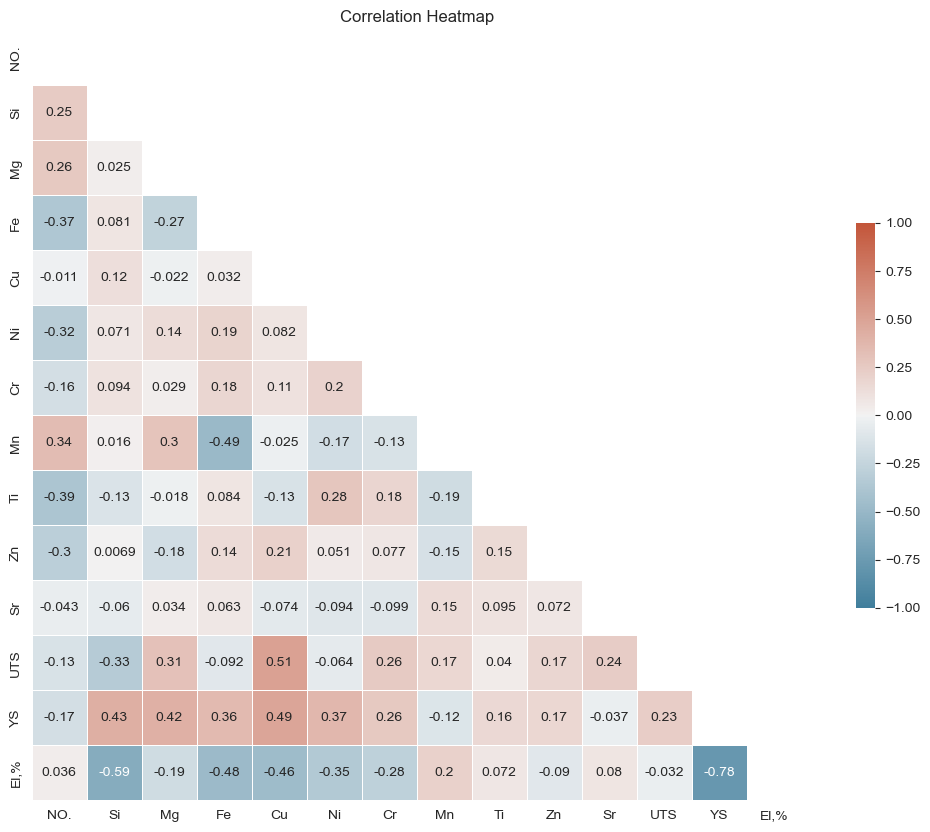

In [29]:
# Compute correlations
corr = knn_imputed_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Initialize the matplotlib figure
plt.figure(figsize=(14, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

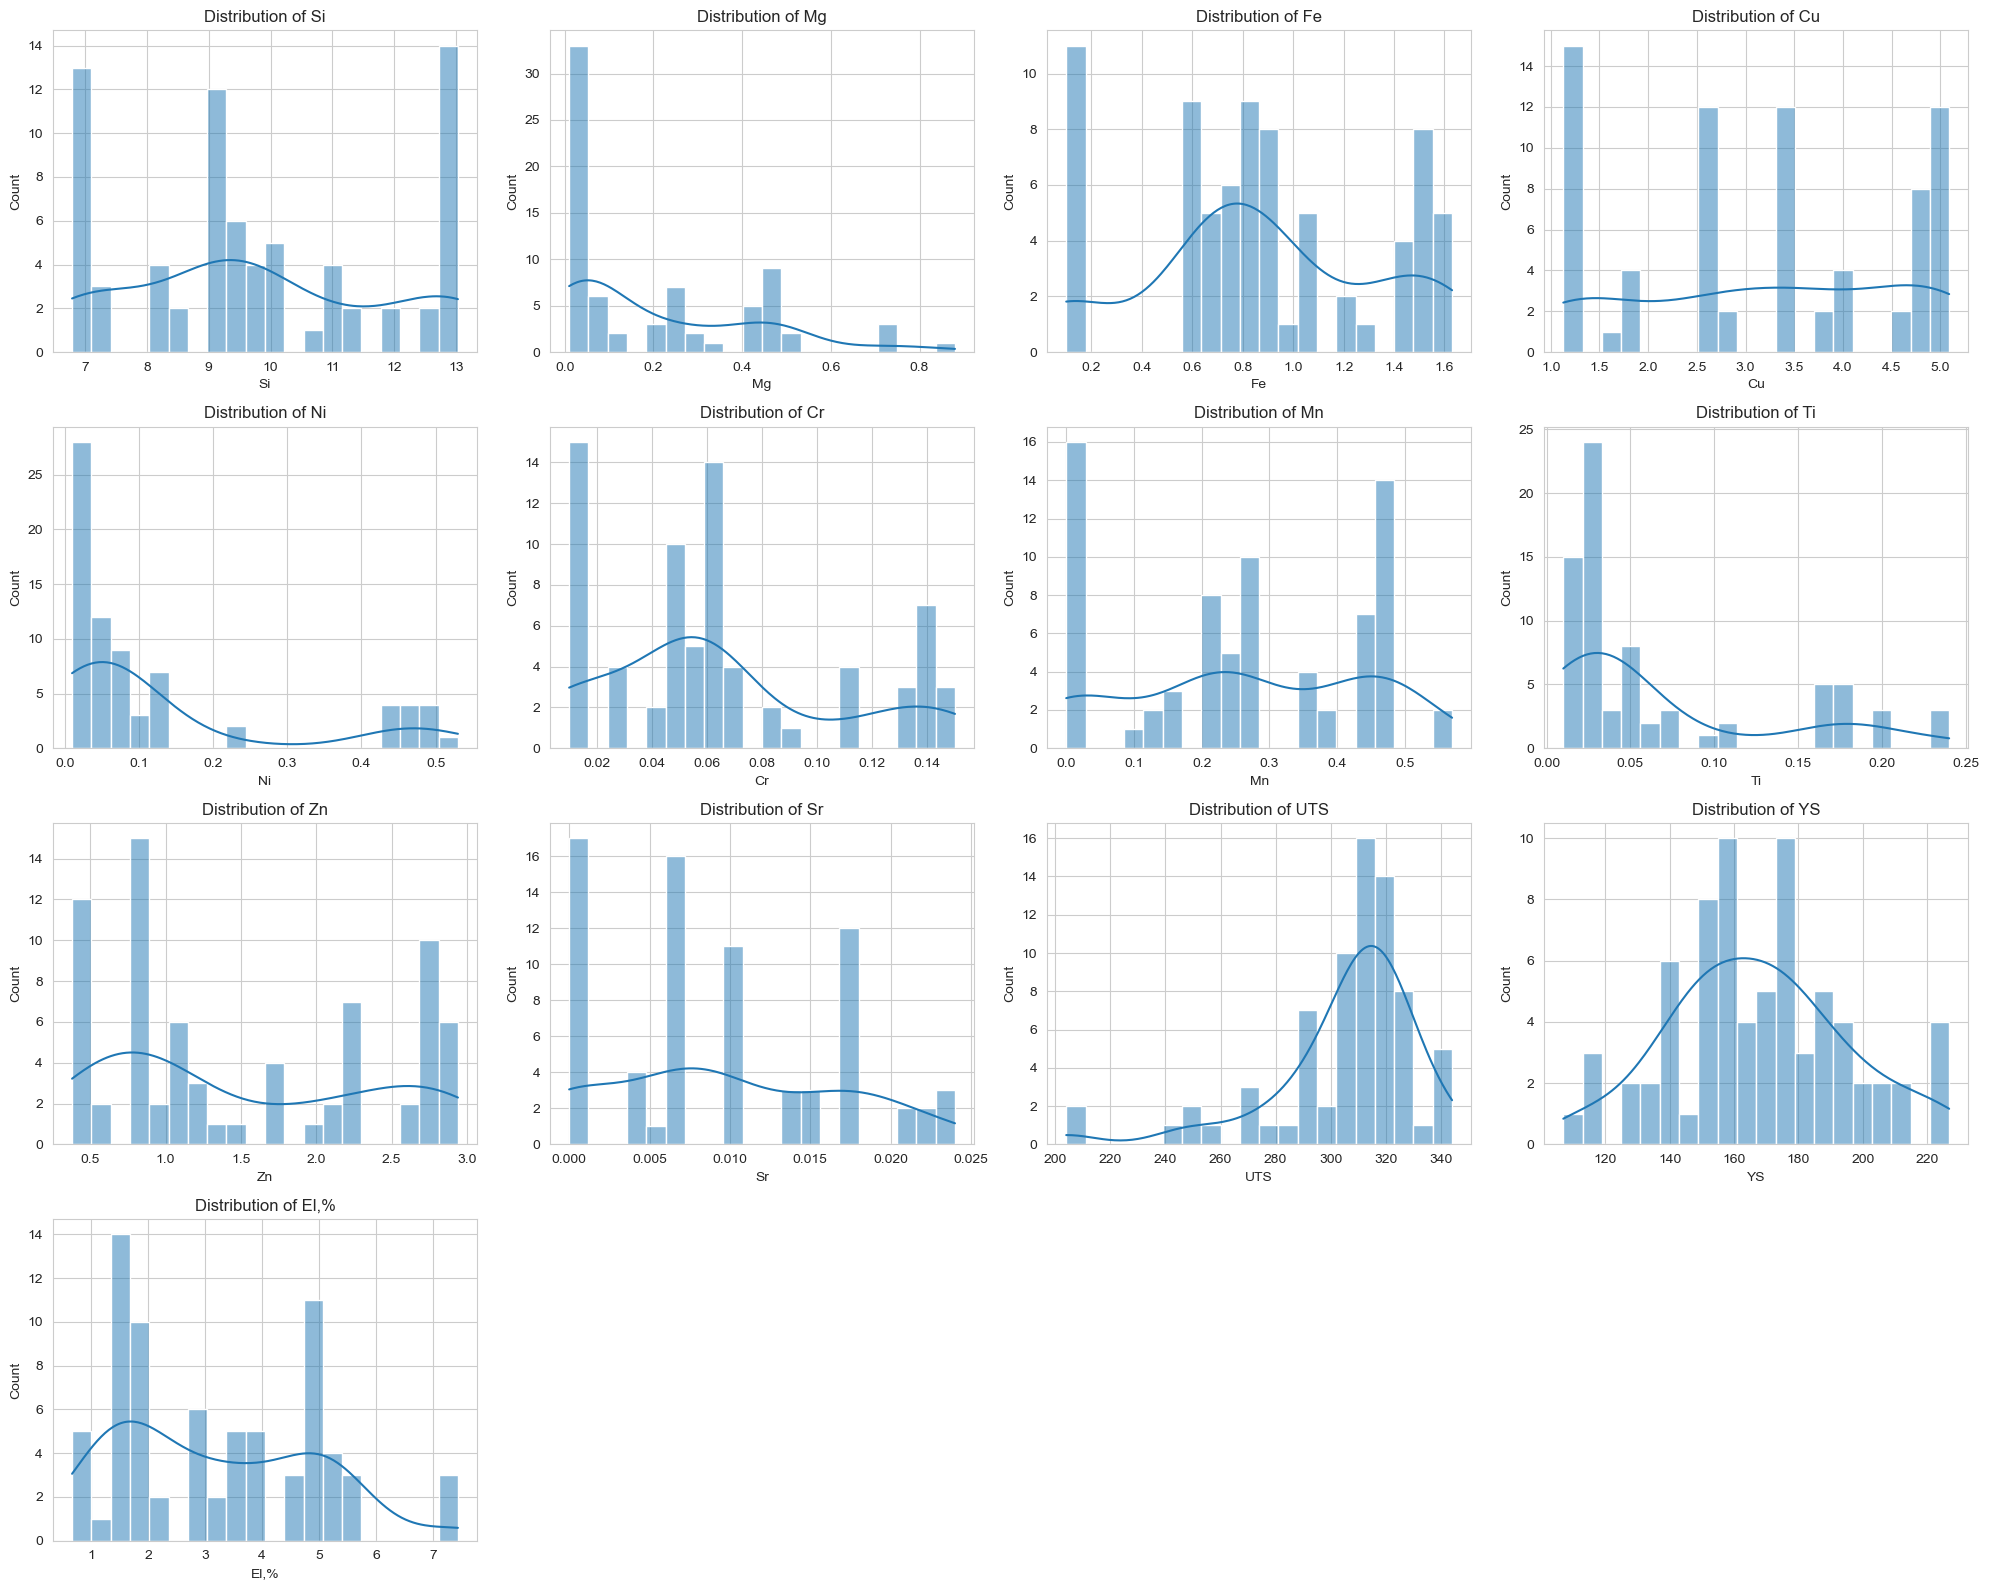

In [30]:
plt.figure(figsize=(20, 16))

# For each column
for i, col in enumerate(cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(knn_imputed_df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Data Modeling 

## YS

In [31]:
# Extracting target variable and defining feature matrix
y_ys = knn_imputed_df['YS']
X = knn_imputed_df.drop(['YS'], axis=1) # Dropping the 'YS' to serve as features

In [32]:
X_train_ys, X_test_ys, y_train_ys, y_holdout_ys = train_test_split(X, y_ys, test_size=0.2, random_state=42)

In [33]:
models_ys = [
    ('Linear Regression', LinearRegression()),
    ('Decision Trees', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('KNN', KNeighborsRegressor()),
    ('SVR', SVR(kernel='linear', C=1.0)),
    ('Lasso', Lasso(alpha=1.0))
]

train_scores_ys = []
validation_scores_ys = []
test_scores_ys = []
mae_scores_ys = []
mse_scores_ys = []

for name, model in models_ys:
    model.fit(X_train_ys, y_train_ys)
    
    # Training score
    train_scores_ys.append(model.score(X_train_ys, y_train_ys))
    
    # Cross-validation score
    validation_scores_ys.append(np.mean(cross_val_score(model, X_train_ys, y_train_ys, cv=5)))
    
    # Test score
    y_pred_ys = model.predict(X_test_ys)
    test_scores_ys.append(r2_score(y_holdout_ys, y_pred_ys))
    
    # Performance metrics
    mae_scores_ys.append(mean_absolute_error(y_holdout_ys, y_pred_ys))
    mse_scores_ys.append(mean_squared_error(y_holdout_ys, y_pred_ys))

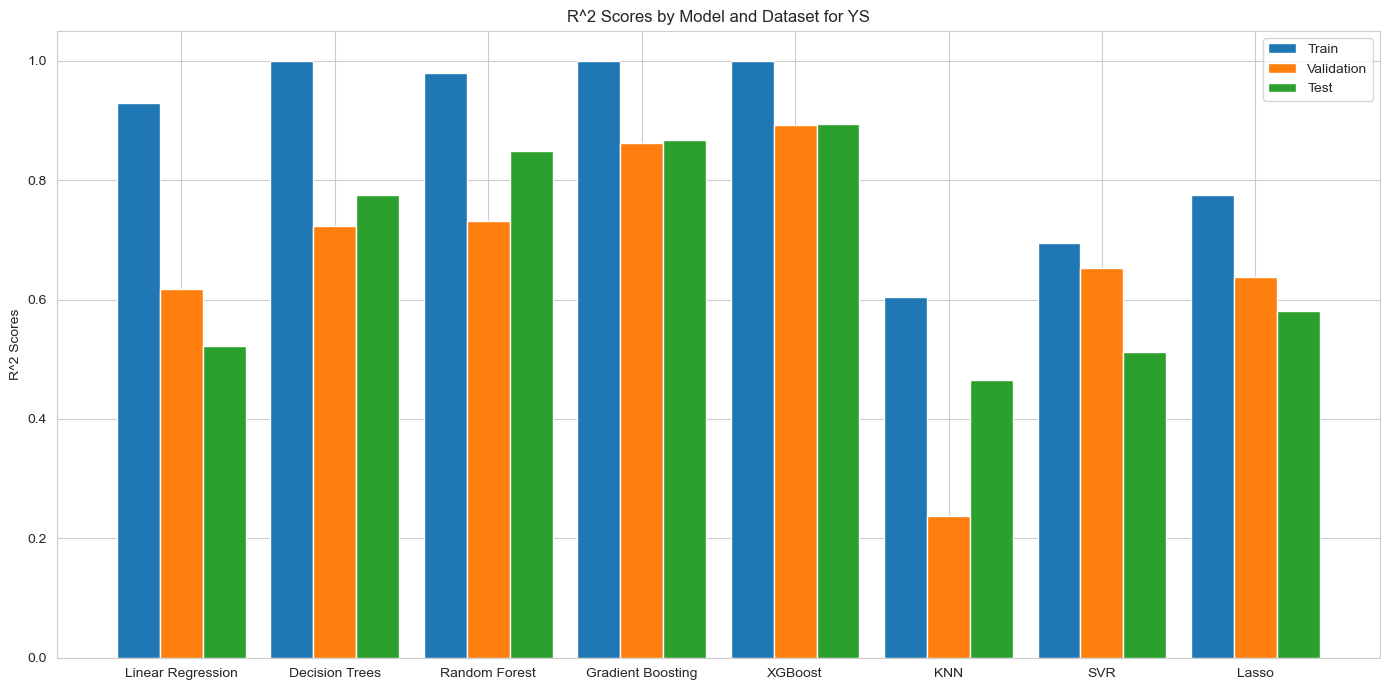

,Model,Train R^2,Validation R^2,Test R^2,MAE,MSE
0,Linear Regression,0.522027,0.617847,0.522027,14.868895,547.365213
1,Decision Trees,0.774272,0.723335,0.774272,7.386667,258.500000
2,Random Forest,0.848401,0.731858,0.848401,9.882840,173.607908
3,Gradient Boosting,0.866732,0.862756,0.866732,6.383656,152.616121
4,XGBoost,0.893551,0.893029,0.893551,4.138450,121.903841
5,KNN,0.466120,0.238364,0.466120,21.231733,611.389622
6,SVR,0.511731,0.652483,0.511731,17.609955,559.156860
7,Lasso,0.580788,0.638352,0.580788,17.407500,480.074008


In [34]:
# Visualization for YS
labels_ys = [name for name, _ in models_ys]
x_ys = np.arange(len(labels_ys))
width = 0.28

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x_ys - width, train_scores_ys, width, label='Train')
rects2 = ax.bar(x_ys, validation_scores_ys, width, label='Validation')
rects3 = ax.bar(x_ys + width, test_scores_ys, width, label='Test')

ax.set_ylabel('R^2 Scores')
ax.set_title('R^2 Scores by Model and Dataset for YS')
ax.set_xticks(x_ys)
ax.set_xticklabels(labels_ys)
ax.legend()

fig.tight_layout()
plt.show()
# Displaying the performance metrics in a table for Elongation (El,%)
performance_data_ys = list(zip(labels_ys, test_scores_ys, validation_scores_ys, test_scores_ys, mae_scores_ys, mse_scores_ys))
performance_df_ys = pd.DataFrame(performance_data_ys, columns=['Model', 'Train R^2', 'Validation R^2', 'Test R^2', 'MAE', 'MSE'])
display(performance_df_ys)

In [35]:
# Creating a DataFrame for R^2 scores (Test scores)
accuracy_df_ys = pd.DataFrame({
    'Model': [name for name, _ in models_ys],
    'R^2 Score': test_scores_ys
})
# Display the table
accuracy_df_ys

,Model,R^2 Score
0,Linear Regression,0.522027
1,Decision Trees,0.774272
2,Random Forest,0.848401
3,Gradient Boosting,0.866732
4,XGBoost,0.893551
5,KNN,0.466120
6,SVR,0.511731
7,Lasso,0.580788


In [36]:
# Assuming necessary libraries are already imported
# Displaying the R^2 scores for each model
algorithms = [name for name, _ in models_ys]
scores_percentage = [score * 100 for score in test_scores_ys]  # Converting R^2 scores to percentage

for i in range(len(algorithms)):
    print(f"The R^2 score (as accuracy) achieved using {algorithms[i]} is: {scores_percentage[i]:.2f} %")

# Finding the model with the highest R^2 score
best_index = scores_percentage.index(max(scores_percentage))
print(f"\nThe best model is {algorithms[best_index]} with an R^2 score (as accuracy) of {scores_percentage[best_index]:.2f} %.")

The R^2 score (as accuracy) achieved using Linear Regression is: 52.20 %
The R^2 score (as accuracy) achieved using Decision Trees is: 77.43 %
The R^2 score (as accuracy) achieved using Random Forest is: 84.84 %
The R^2 score (as accuracy) achieved using Gradient Boosting is: 86.67 %
The R^2 score (as accuracy) achieved using XGBoost is: 89.36 %
The R^2 score (as accuracy) achieved using KNN is: 46.61 %
The R^2 score (as accuracy) achieved using SVR is: 51.17 %
The R^2 score (as accuracy) achieved using Lasso is: 58.08 %

The best model is XGBoost with an R^2 score (as accuracy) of 89.36 %.



## EL

In [37]:
y_el = knn_imputed_df['El,%']
X_train_el, X_test_el, y_train_el, y_holdout_el = train_test_split(X, y_el, test_size=0.2, random_state=42)

In [38]:
models_el = [
    ('Linear Regression', LinearRegression()),
    ('Decision Trees', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost', XGBRegressor(n_estimators=100, random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('SVR', SVR(kernel='linear', C=1.0)),
    ('Lasso', Lasso(alpha=1.0))
]

train_scores_el = []
validation_scores_el = []
test_scores_el = []
mae_scores_el = []
mse_scores_el = []

for name, model in models_el:
    model.fit(X_train_el, y_train_el)
    
    # Training score
    train_scores_el.append(model.score(X_train_el, y_train_el))
    
    # Cross-validation score
    validation_scores_el.append(np.mean(cross_val_score(model, X_train_el, y_train_el, cv=5)))
    
    # Test score
    y_pred_el = model.predict(X_test_el)
    test_scores_el.append(r2_score(y_holdout_el, y_pred_el))
    
    # Performance metrics
    mae_scores_el.append(mean_absolute_error(y_holdout_el, y_pred_el))
    mse_scores_el.append(mean_squared_error(y_holdout_el, y_pred_el))

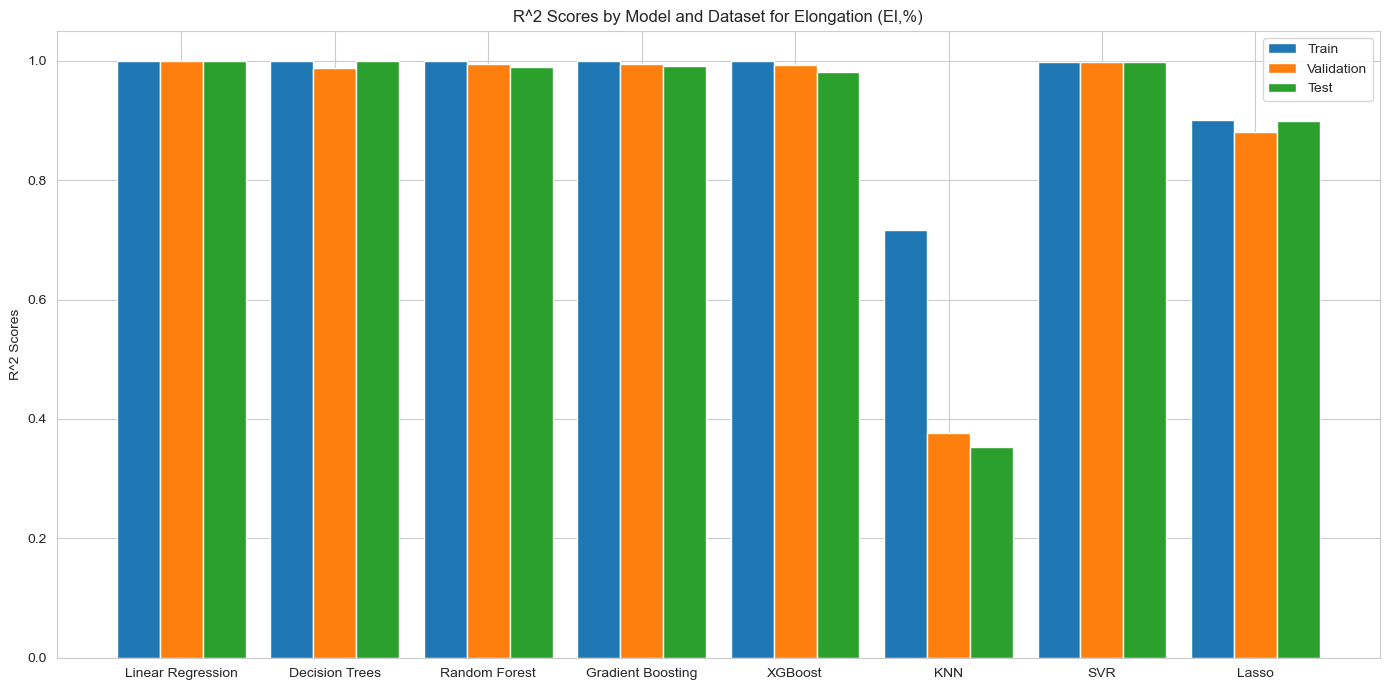

,Model,Train R^2,Validation R^2,Test R^2,MAE,MSE
0,Linear Regression,1.000000,1.000000,1.000000,8.482104e-15,9.665847e-29
1,Decision Trees,1.000000,0.987539,0.998762,3.506667e-02,3.447733e-03
2,Random Forest,0.998848,0.993783,0.989652,1.289400e-01,2.881128e-02
3,Gradient Boosting,1.000000,0.994564,0.991710,7.776006e-02,2.307921e-02
4,XGBoost,1.000000,0.992592,0.981491,9.641810e-02,5.153010e-02
5,KNN,0.716802,0.376875,0.352848,1.110933e+00,1.801745e+00
6,SVR,0.998554,0.997930,0.997554,6.368805e-02,6.808836e-03
7,Lasso,0.899958,0.879845,0.899839,4.914731e-01,2.788598e-01


In [39]:
# Visualization for Elongation (El,%)
labels_el = [name for name, _ in models_el]
x_el = np.arange(len(labels_el))
width = 0.28

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x_el - width, train_scores_el, width, label='Train')
rects2 = ax.bar(x_el, validation_scores_el, width, label='Validation')
rects3 = ax.bar(x_el + width, test_scores_el, width, label='Test')

ax.set_ylabel('R^2 Scores')
ax.set_title('R^2 Scores by Model and Dataset for Elongation (El,%)')
ax.set_xticks(x_el)
ax.set_xticklabels(labels_el)
ax.legend()

fig.tight_layout()
plt.show()

# Displaying the performance metrics in a table for Elongation (El,%)
performance_data_el = list(zip(labels_el, train_scores_el, validation_scores_el, test_scores_el, mae_scores_el, mse_scores_el))
performance_df_el = pd.DataFrame(performance_data_el, columns=['Model', 'Train R^2', 'Validation R^2', 'Test R^2', 'MAE', 'MSE'])
display(performance_df_el)

In [40]:
# Assuming necessary libraries are already imported
# Displaying the R^2 scores for each model
algorithms = [name for name, _ in models_el]
scores_percentage = [score * 100 for score in test_scores_el]  # Converting R^2 scores to percentage

for i in range(len(algorithms)):
    print(f"The R^2 score (as accuracy) achieved using {algorithms[i]} is: {scores_percentage[i]:.2f} %")

# Finding the model with the highest R^2 score
best_index = scores_percentage.index(max(scores_percentage))
print(f"\nThe best model is {algorithms[best_index]} with an R^2 score (as accuracy) of {scores_percentage[best_index]:.2f} %.")

The R^2 score (as accuracy) achieved using Linear Regression is: 100.00 %
The R^2 score (as accuracy) achieved using Decision Trees is: 99.88 %
The R^2 score (as accuracy) achieved using Random Forest is: 98.97 %
The R^2 score (as accuracy) achieved using Gradient Boosting is: 99.17 %
The R^2 score (as accuracy) achieved using XGBoost is: 98.15 %
The R^2 score (as accuracy) achieved using KNN is: 35.28 %
The R^2 score (as accuracy) achieved using SVR is: 99.76 %
The R^2 score (as accuracy) achieved using Lasso is: 89.98 %

The best model is Linear Regression with an R^2 score (as accuracy) of 100.00 %.


## UTS

In [41]:
y_uts = knn_imputed_df['UTS']
X_train_uts, X_test_uts, y_train_uts, y_holdout_uts = train_test_split(X, y_uts, test_size=0.2, random_state=42)

In [42]:
models_uts = [
    ('Linear Regression', LinearRegression()),
    ('Decision Trees', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('XGBoost', XGBRegressor(n_estimators=100, random_state=42)),
    ('KNN', KNeighborsRegressor(n_neighbors=5)),
    ('SVR', SVR(kernel='linear', C=1.0)),
    ('Lasso', Lasso(alpha=1.0))
]

train_scores_uts = []
validation_scores_uts = []
test_scores_uts = []
mae_scores_uts = []
mse_scores_uts = []

for name, model in models_uts:
    model.fit(X_train_uts, y_train_uts)
    
    # Training score
    train_scores_uts.append(model.score(X_train_uts, y_train_uts))
    
    # Cross-validation score
    validation_scores_uts.append(np.mean(cross_val_score(model, X_train_uts, y_train_uts, cv=5)))
    
    # Test score
    y_pred_uts = model.predict(X_test_uts)
    test_scores_uts.append(r2_score(y_holdout_uts, y_pred_uts))
    
    # Performance metrics
    mae_scores_uts.append(mean_absolute_error(y_holdout_uts, y_pred_uts))
    mse_scores_uts.append(mean_squared_error(y_holdout_uts, y_pred_uts))

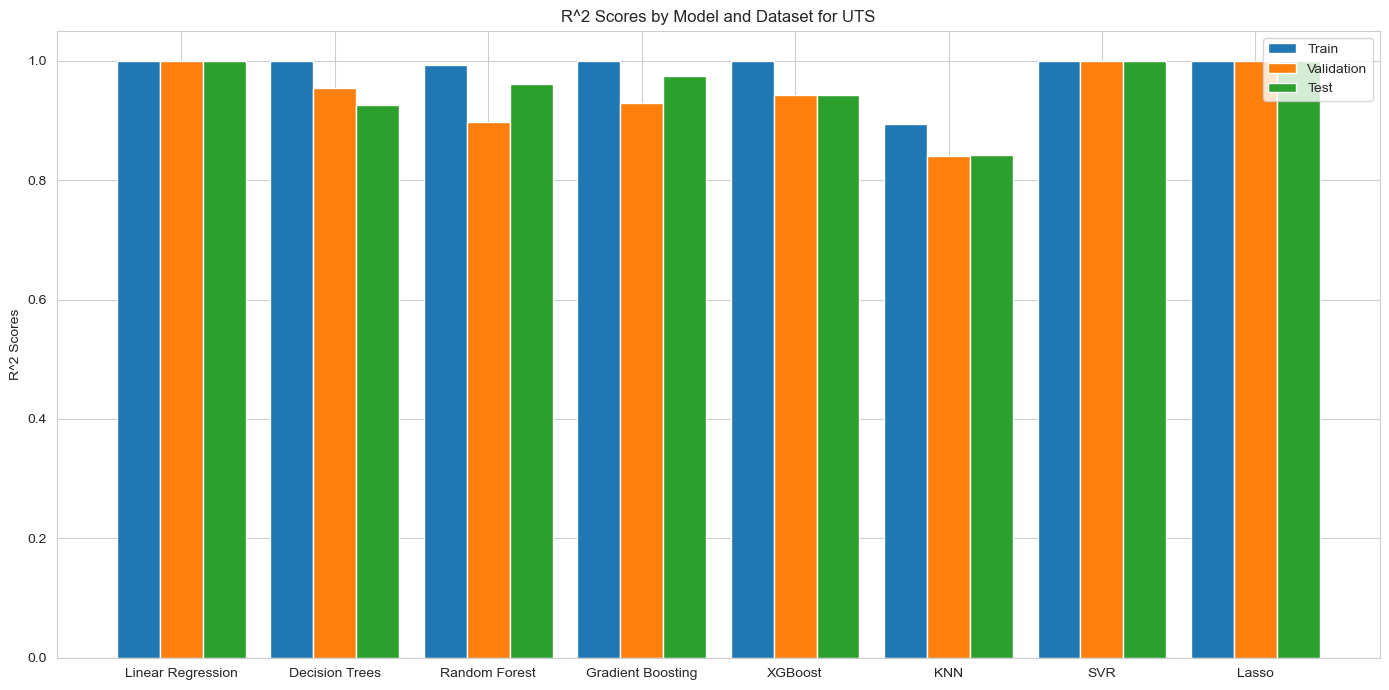

,Model,Train R^2,Validation R^2,Test R^2,MAE,MSE
0,Linear Regression,1.000000,1.000000,1.000000,2.652693e-14,1.938705e-27
1,Decision Trees,1.000000,0.954049,0.925631,3.316000e+00,9.452957e+01
2,Random Forest,0.993018,0.897758,0.960683,3.816400e+00,4.997586e+01
3,Gradient Boosting,1.000000,0.929597,0.973614,2.003362e+00,3.353920e+01
4,XGBoost,1.000000,0.942648,0.942106,2.962922e+00,7.358897e+01
5,KNN,0.894227,0.840698,0.841742,8.320000e+00,2.011605e+02
6,SVR,0.999994,0.999986,0.999997,5.070586e-02,3.686988e-03
7,Lasso,0.999997,0.999996,0.999996,4.456427e-02,4.517702e-03


In [43]:
# Visualization for UTS
labels_uts = [name for name, _ in models_uts]
x_uts = np.arange(len(labels_uts))
width = 0.28

fig, ax = plt.subplots(figsize=(14, 7))
rects1 = ax.bar(x_uts - width, train_scores_uts, width, label='Train')
rects2 = ax.bar(x_uts, validation_scores_uts, width, label='Validation')
rects3 = ax.bar(x_uts + width, test_scores_uts, width, label='Test')

ax.set_ylabel('R^2 Scores')
ax.set_title('R^2 Scores by Model and Dataset for UTS')
ax.set_xticks(x_uts)
ax.set_xticklabels(labels_uts)
ax.legend()

fig.tight_layout()
plt.show()

# Displaying the performance metrics in a table for UTS
performance_data_uts = list(zip(labels_uts, train_scores_uts, validation_scores_uts, test_scores_uts, mae_scores_uts, mse_scores_uts))
performance_df_uts = pd.DataFrame(performance_data_uts, columns=['Model', 'Train R^2', 'Validation R^2', 'Test R^2', 'MAE', 'MSE'])
display(performance_df_uts)


In [44]:
# Assuming necessary libraries are already imported
# Displaying the R^2 scores for each model
algorithms = [name for name, _ in models_uts]
scores_percentage = [score * 100 for score in test_scores_uts]  # Converting R^2 scores to percentage

for i in range(len(algorithms)):
    print(f"The R^2 score (as accuracy) achieved using {algorithms[i]} is: {scores_percentage[i]:.2f} %")

# Finding the model with the highest R^2 score
best_index = scores_percentage.index(max(scores_percentage))
print(f"\nThe best model is {algorithms[best_index]} with an R^2 score (as accuracy) of {scores_percentage[best_index]:.2f} %.")

The R^2 score (as accuracy) achieved using Linear Regression is: 100.00 %
The R^2 score (as accuracy) achieved using Decision Trees is: 92.56 %
The R^2 score (as accuracy) achieved using Random Forest is: 96.07 %
The R^2 score (as accuracy) achieved using Gradient Boosting is: 97.36 %
The R^2 score (as accuracy) achieved using XGBoost is: 94.21 %
The R^2 score (as accuracy) achieved using KNN is: 84.17 %
The R^2 score (as accuracy) achieved using SVR is: 100.00 %
The R^2 score (as accuracy) achieved using Lasso is: 100.00 %

The best model is Linear Regression with an R^2 score (as accuracy) of 100.00 %.


# Cross Validation for YS 

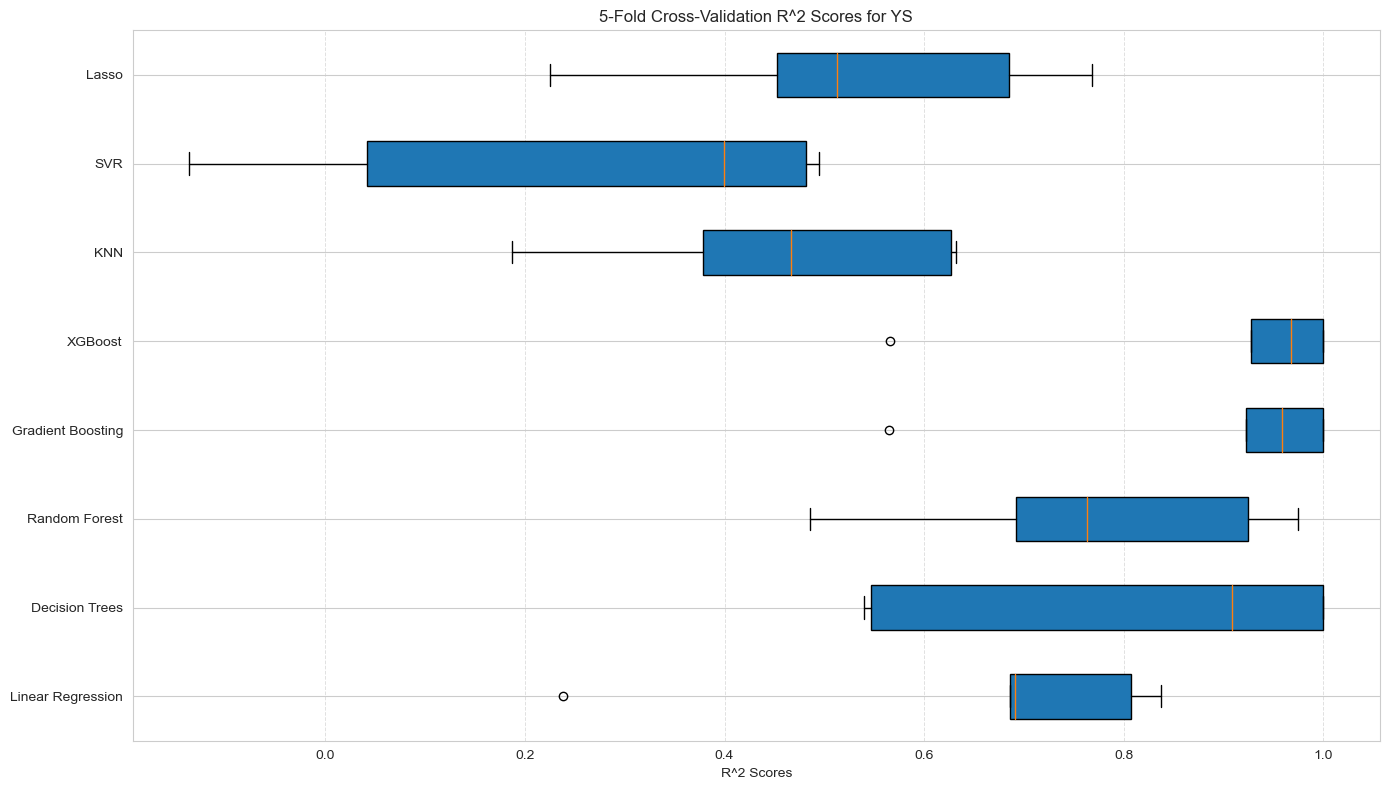

In [45]:
# Splitting the data for YS target variable
X = knn_imputed_df.drop(['NO.', 'UTS', 'YS', 'El,%'], axis=1)
y_ys = knn_imputed_df['YS']

# For each model, compute the 5-fold cross-validation score
cross_val_scores_ys = []
for name, model in models_ys:
    cv_scores = cross_val_score(model, X, y_ys, cv=5)
    cross_val_scores_ys.append(cv_scores)

# Visualization of 5-Fold Cross-Validation scores for YS
labels = [name for name, _ in models_ys]
plt.figure(figsize=(14, 8))
plt.boxplot(cross_val_scores_ys, vert=False, patch_artist=True)
plt.yticks(np.arange(1, len(labels) + 1), labels)
plt.xlabel('R^2 Scores')
plt.title('5-Fold Cross-Validation R^2 Scores for YS')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()

# Return the mean and standard deviation of the cross-validation scores for each model
cross_val_summary_ys = [(name, np.mean(scores), np.std(scores)) for name, scores in zip(labels, cross_val_scores_ys)]
#print(cross_val_summary_ys)

In [46]:
# Convert the summary list to a DataFrame
cross_val_df_ys = pd.DataFrame(cross_val_summary_ys, columns=['Model', 'Mean R^2', 'Standard Deviation'])

# Display the table
cross_val_df_ys

,Model,Mean R^2,Standard Deviation
0,Linear Regression,0.651922,0.215415
1,Decision Trees,0.799144,0.211410
2,Random Forest,0.768253,0.174791
3,Gradient Boosting,0.889345,0.164635
4,XGBoost,0.892184,0.165511
5,KNN,0.458167,0.166419
6,SVR,0.256313,0.256276
7,Lasso,0.528731,0.189790


# Cross Validation for EL

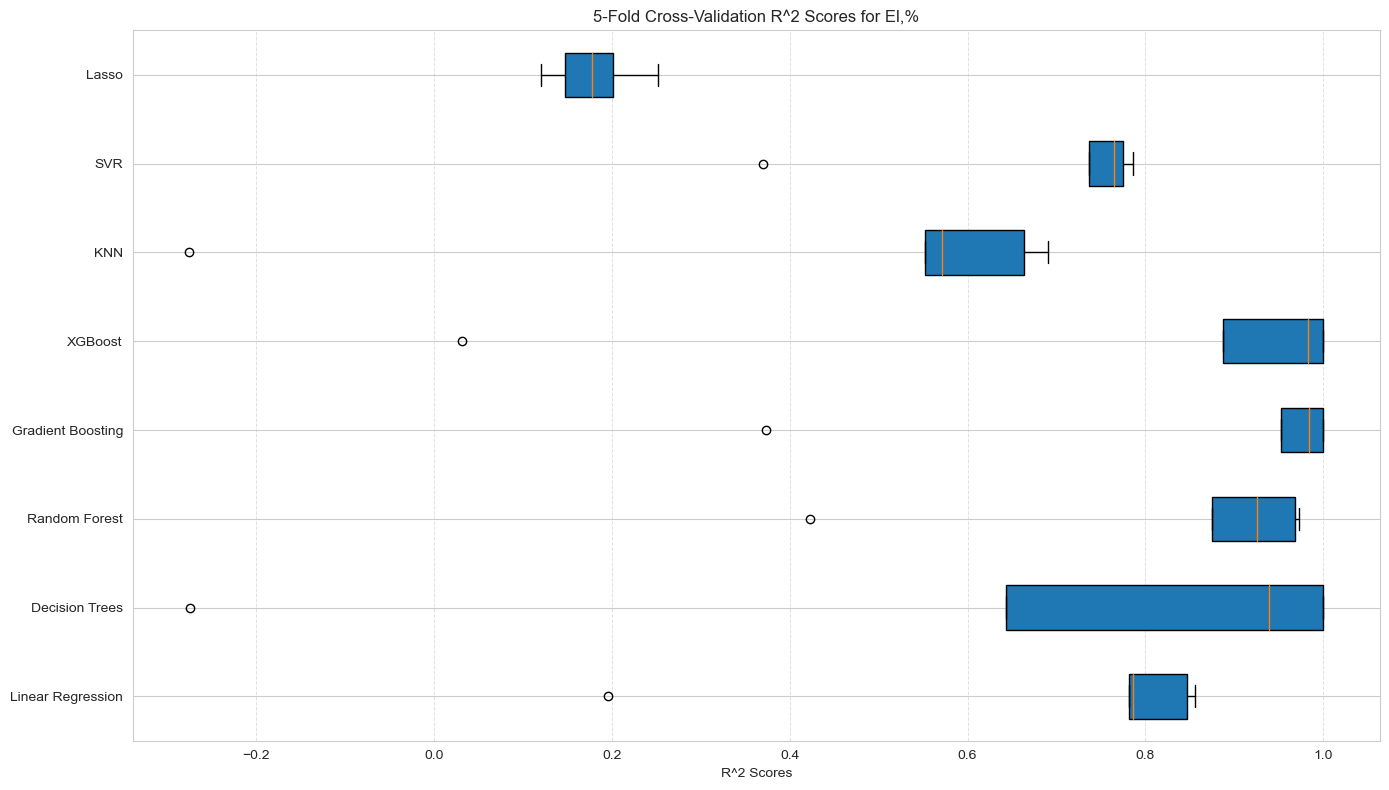

In [47]:
# Splitting the data for El,% target variable
X = knn_imputed_df.drop(['NO.', 'UTS', 'YS', 'El,%'], axis=1)
y_el = knn_imputed_df['El,%']

# For each model, compute the 5-fold cross-validation score
cross_val_scores_el = []
for name, model in models_el:
    cv_scores = cross_val_score(model, X, y_el, cv=5)
    cross_val_scores_el.append(cv_scores)

# Visualization of 5-Fold Cross-Validation scores for El,%
labels = [name for name, _ in models_el]
plt.figure(figsize=(14, 8))
plt.boxplot(cross_val_scores_el, vert=False, patch_artist=True)
plt.yticks(np.arange(1, len(labels) + 1), labels)
plt.xlabel('R^2 Scores')
plt.title('5-Fold Cross-Validation R^2 Scores for El,%')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()

# Return the mean and standard deviation of the cross-validation scores for each model
cross_val_summary_el = [(name, np.mean(scores), np.std(scores)) for name, scores in zip(labels, cross_val_scores_el)]
#print(cross_val_summary_el)

In [48]:
# Convert the summary list to a DataFrame
cross_val_summary_el = pd.DataFrame(cross_val_summary_el, columns=['Model', 'Mean R^2', 'Standard Deviation'])

# Display the table
cross_val_summary_el

,Model,Mean R^2,Standard Deviation
0,Linear Regression,0.692901,0.250354
1,Decision Trees,0.661485,0.486269
2,Random Forest,0.832647,0.208065
3,Gradient Boosting,0.862040,0.244799
4,XGBoost,0.780354,0.376778
5,KNN,0.440447,0.361602
6,SVR,0.686259,0.159163
7,Lasso,0.179511,0.045398


# Cross Validation for UTS

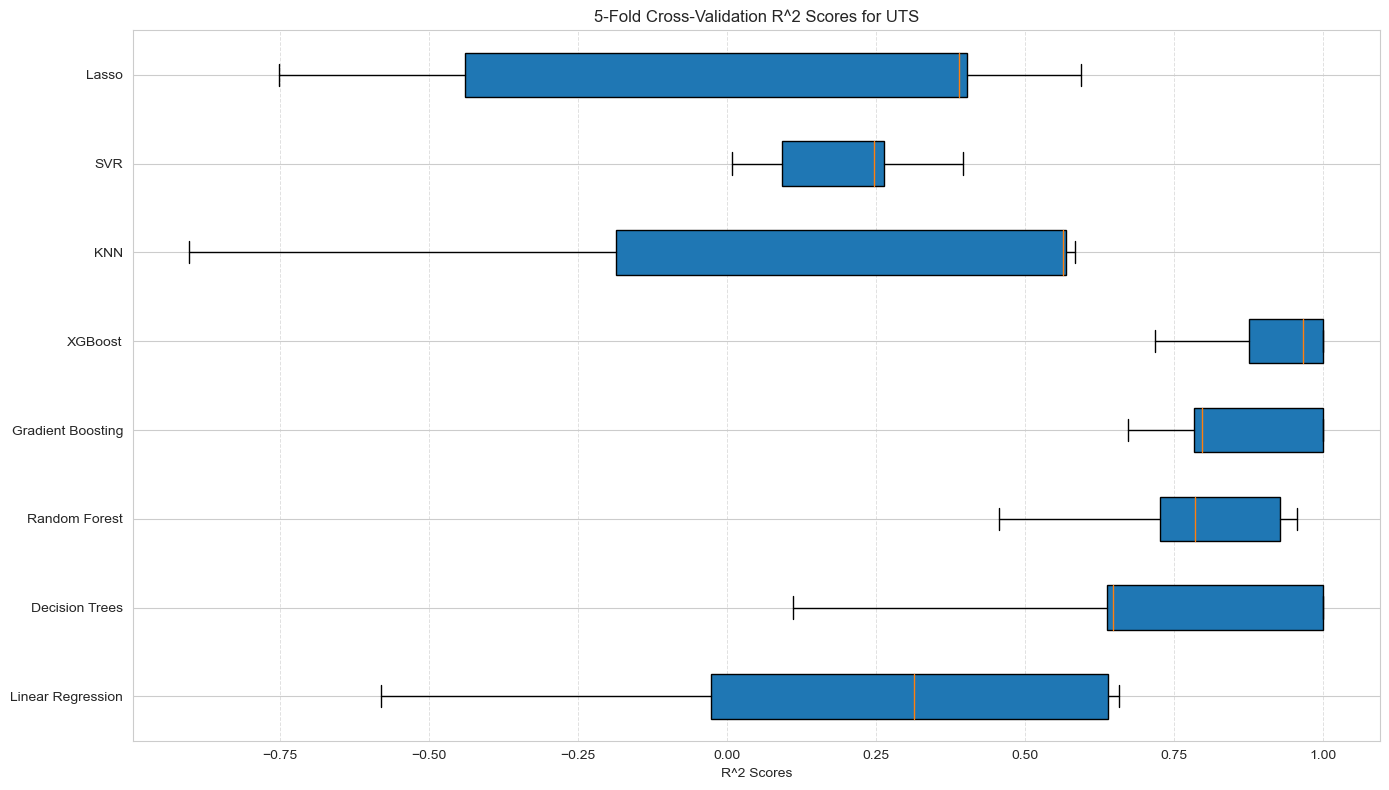

In [49]:
# Splitting the data for UTS target variable again
X = knn_imputed_df.drop(['NO.', 'UTS', 'YS', 'El,%'], axis=1)
y_uts = knn_imputed_df['UTS']

# For each model, compute the 5-fold cross-validation score
cross_val_scores_uts = []
for name, model in models_uts:
    cv_scores = cross_val_score(model, X, y_uts, cv=5)
    cross_val_scores_uts.append(cv_scores)

# Visualization of 5-Fold Cross-Validation scores for UTS
labels = [name for name, _ in models_uts]
plt.figure(figsize=(14, 8))
plt.boxplot(cross_val_scores_uts, vert=False, patch_artist=True)
plt.yticks(np.arange(1, len(labels) + 1), labels)
plt.xlabel('R^2 Scores')
plt.title('5-Fold Cross-Validation R^2 Scores for UTS')
plt.grid(True, axis='x', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()

# Return the mean and standard deviation of the cross-validation scores for each model
cross_val_summary_uts = [(name, np.mean(scores), np.std(scores)) for name, scores in zip(labels, cross_val_scores_uts)]
#cross_val_summary_uts



In [50]:
# Convert the summary list to a DataFrame
cross_val_summary_uts = pd.DataFrame(cross_val_summary_uts, columns=['Model', 'Mean R^2', 'Standard Deviation'])
# Display the table
cross_val_summary_uts

,Model,Mean R^2,Standard Deviation
0,Linear Regression,0.200338,0.464141
1,Decision Trees,0.678784,0.326416
2,Random Forest,0.769729,0.179067
3,Gradient Boosting,0.850101,0.129647
4,XGBoost,0.912116,0.107041
5,KNN,0.125136,0.592029
6,SVR,0.200641,0.136471
7,Lasso,0.038736,0.532042


## Results

In [51]:
# Create a DataFrame for the R^2 scores
accuracy_df = pd.DataFrame({
    'Model': [name for name, _ in models_ys],
    'R^2 Score for YS (%)': [score * 100 for score in test_scores_ys],
    'R^2 Score for EL (%)': [score * 100 for score in test_scores_el],
    'R^2 Score for UTS (%)': [score * 100 for score in test_scores_uts]
})

In [52]:
accuracy_df#knn

,Model,R^2 Score for YS (%),R^2 Score for EL (%),R^2 Score for UTS (%)
0,Linear Regression,52.202749,100.000000,100.000000
1,Decision Trees,77.427156,99.876164,92.563143
2,Random Forest,84.840138,98.965155,96.068285
3,Gradient Boosting,86.673192,99.171040,97.361395
4,XGBoost,89.355062,98.149139,94.210588
5,KNN,46.611983,35.284814,84.174248
6,SVR,51.173073,99.755440,99.999710
7,Lasso,58.078779,89.983898,99.999645


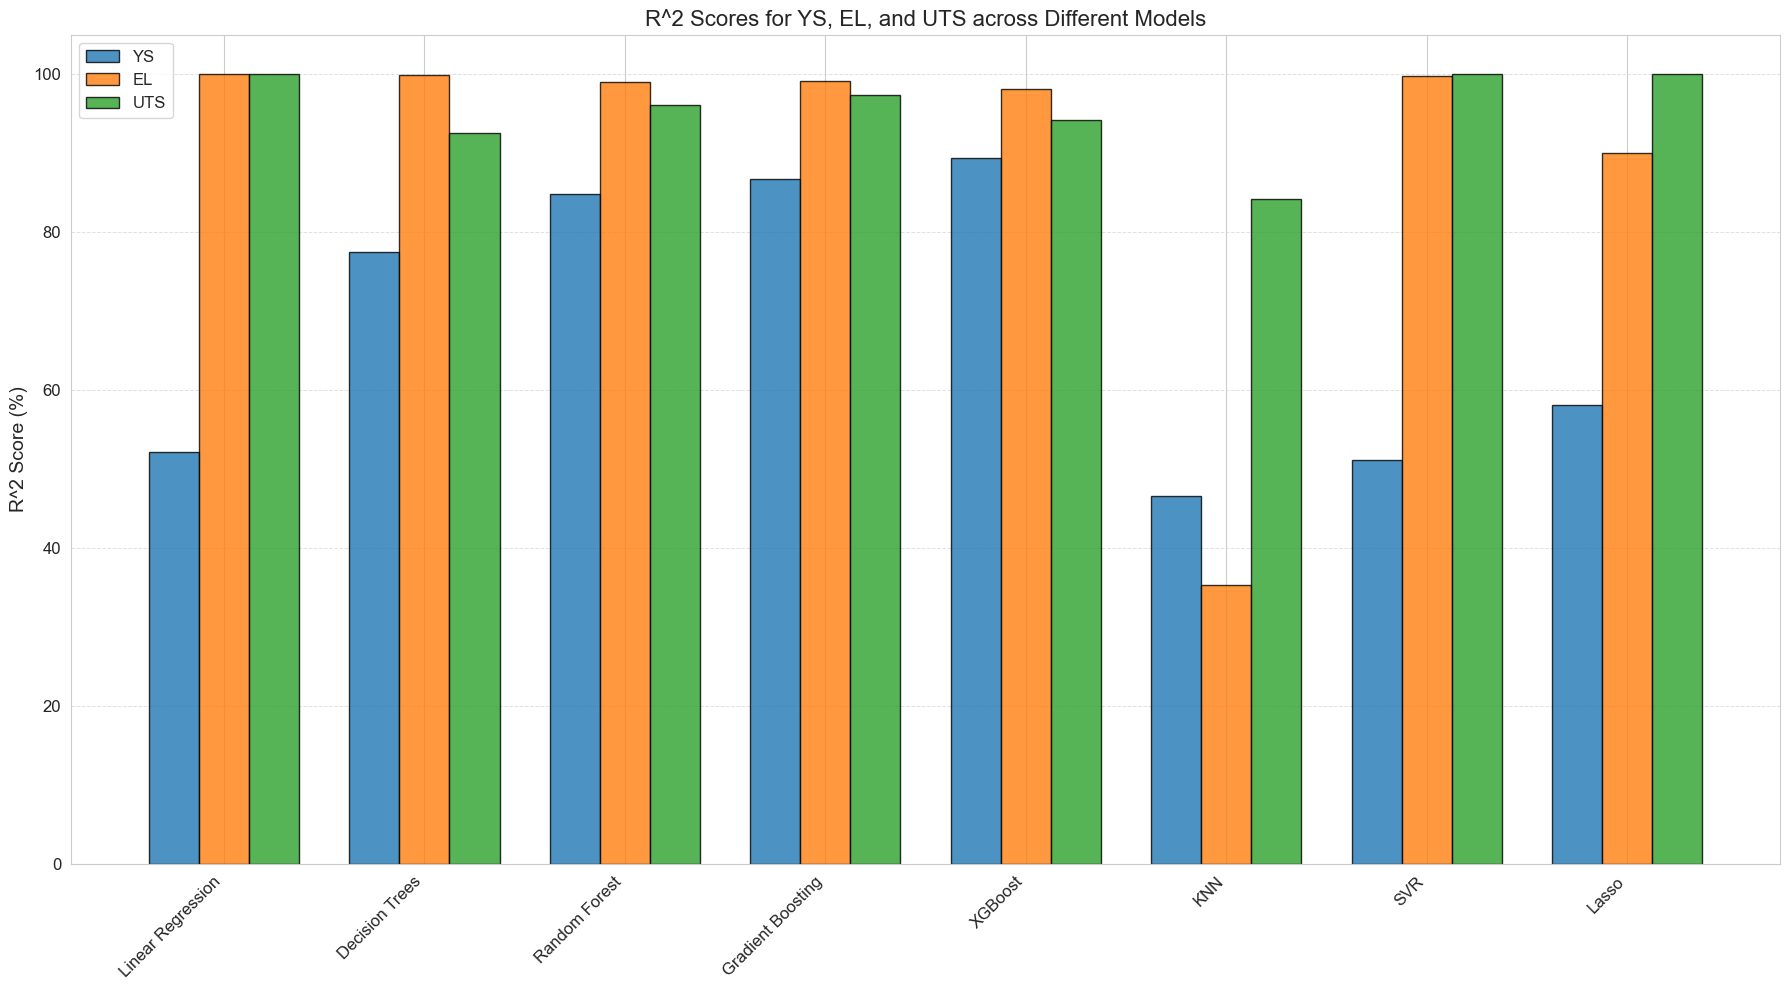

In [53]:
models = [name for name, _ in models_ys]
scores_ys_percentage = [score * 100 for score in test_scores_ys]
scores_el_percentage = [score * 100 for score in test_scores_el]
scores_uts_percentage = [score * 100 for score in test_scores_uts]

# Plotting the R^2 scores for each model and target variable
x = range(len(models))
width = 0.25

# Sophisticated color palette
elegant_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Elegant blue, orange, and green

plt.figure(figsize=(18, 10))

# Plotting bars with elegant colors
plt.bar([i - width for i in x], scores_ys_percentage, width=width, label='YS', color=elegant_colors[0], edgecolor='black', alpha=0.8)
plt.bar(x, scores_el_percentage, width=width, label='EL', color=elegant_colors[1], edgecolor='black', alpha=0.8)
plt.bar([i + width for i in x], scores_uts_percentage, width=width, label='UTS', color=elegant_colors[2], edgecolor='black', alpha=0.8)

# Setting labels, title, and legend
plt.ylabel('R^2 Score (%)', fontsize=14)
plt.title('R^2 Scores for YS, EL, and UTS across Different Models', fontsize=16)
plt.xticks(x, models, rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, axis='y', linestyle='--', linewidth=0.7, alpha=0.6)
plt.tight_layout()
plt.show()